# HW1: ANOVA

# 1. Recall and write down the assumptions which one-way ANOVA are based on.

ANOVA 基于三个基本假设：
1. 数据是随机采样产生的
2. 不同的组的数据是同方差的
3. 数据的残差服从正态分布

# 2. null (H0) and the alternative (H1) hypotheses for the significance of Average Age and Category:

$H_0$: 所有的种类具有相同的平均年龄

$H_1$: 并非所有的组具有相同的平均年龄

# 3. Simple Programming

In [1]:
from core import *  # all the code used in this homework
data = pd.read_excel('data.xlsx'); data.head(2)

,群名,群类别,群人数,消息数,稠密度,性别比,平均年龄,年龄差,地域集中度,手机比例,会话数,无回应比例,夜聊比例,图片比例
0,**手酒吧,1,63,315,0.051715,0.882353,26.681818,6.409413,0.222222,0.088889,23,0.434783,0.085714,0.069841
1,**秀嘉园,1,73,2,0.010274,0.579710,27.500000,9.042524,0.406780,0.000000,2,1.000000,1.000000,0.000000


## 3.a pdf for col[7]

平均年龄的分布图如下，并使用Shapiro-Wilktest检测结果表明，该分布不符合正态性；

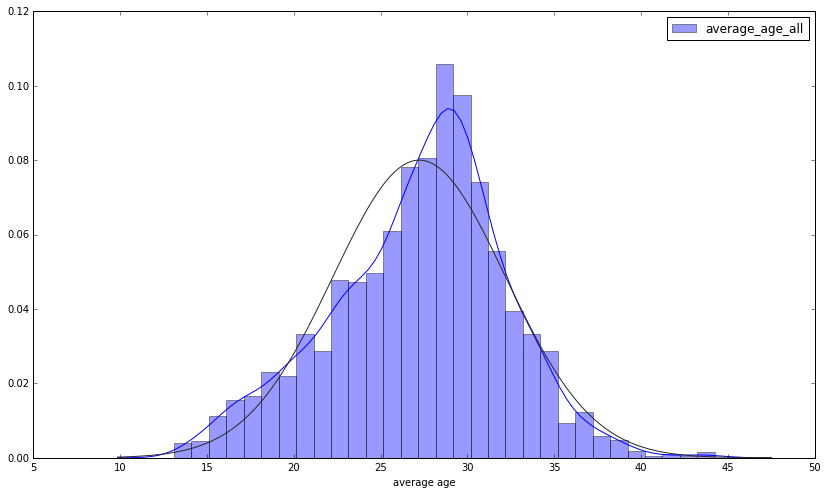

Normality: False


In [2]:
plt.figure(figsize=(14,8))
sns.distplot(data['平均年龄'],  axlabel='average age', fit=stats.norm, label='average_age_all');plt.legend();plt.show()
print("Normality: %s" % (stats.shapiro(data['平均年龄'])[1] > 0.05))

## 3.b Normality of each component and homogeneity(Col[7]: 'average age')

我们按照类别绘制了boxplot, 并计算了各个的标准差, 进行了正态性检验，结果说明，只有category3符合正态性，并数据整体不具有同质性（homogenity）。

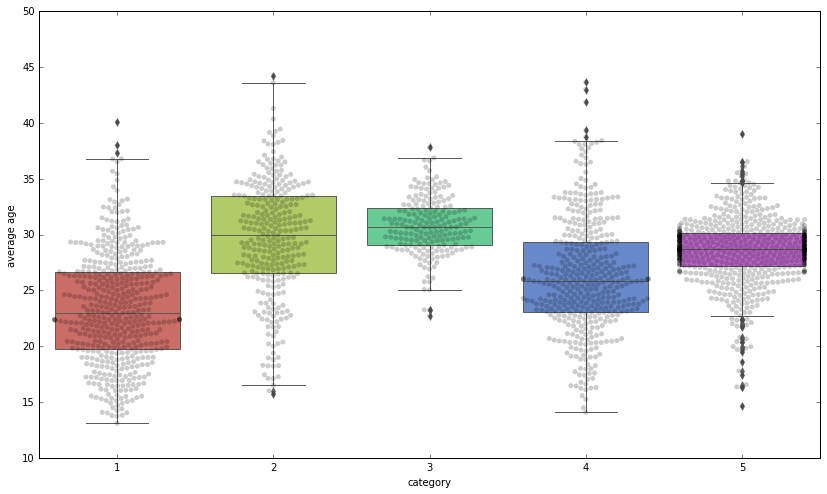

In [3]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='群类别', y='平均年龄', data=data, palette='hls')
sns.swarmplot(x='群类别', y='平均年龄', data=data, color='black', alpha=.2)
plt.xlabel('category'); plt.ylabel('average age'); plt.show()

In [4]:
res_df = norm_test(data, '平均年龄', range(1, 6)); res_df.head(6)

,category,num-of-data,mean,p-value,normality,std-dev,homogeneity
0,1,484,23.4043,0.00100642,False,4.92376,
1,2,300,29.6182,0.00691234,False,5.21737,
2,3,196,30.7915,0.155868,True,2.5529,
3,4,425,26.2553,0.000113727,False,5.09826,
4,5,635,28.5451,4.54529e-13,False,3.01898,
5,,,,,,,False


#### 3.c
首先，我们说明上述数据并不符合ANOVA的基本假设，在下面的计算中，我们依旧按照ANOVA的基本计算方法计算了各项指标，如下：

In [5]:
anova(res_df).head()

,Source,SS,df,MS,F,p
0,Between,12782.918190,4,3195.73,171.507,1.11022e-16
1,Within,37918.617834,2035,18.6332,,
2,Total,50701.536024,2039,,,


### 4 Choose another three col and test for the result of A.
我们选择了 '消息数', '年龄差', '会话数' 和对应的log transformation来进行分析；
结果如下，可以看出，这些结果，均不符合我们的要求；

Normality of origin: False; log-transform: False


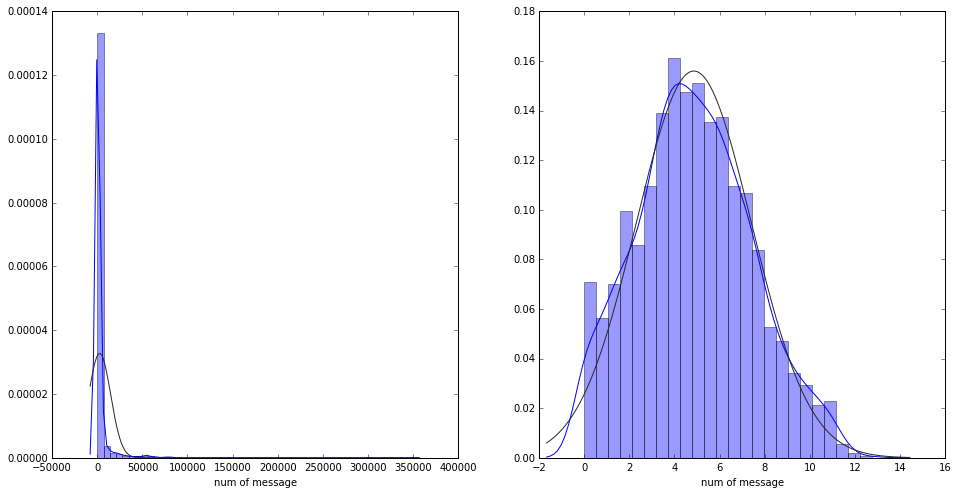

In [6]:
plt.figure(figsize=(16, 8)); log_trans_data = [math.log(x) for x in data['消息数']]
ax = plt.subplot(1,2,1);sns.distplot(data['消息数'], axlabel='num of message', fit=stats.norm)
ax = plt.subplot(1,2,2);sns.distplot(log_trans_data, axlabel='num of message', fit=stats.norm)

print("Normality of origin: %s; log-transform: %s" % (stats.shapiro(data['消息数'])[1] > 0.05,
                                                      stats.shapiro(log_trans_data)[1] > 0.05))

#### '年龄差' and its log transformation

Normality of origin: False; log-transform: False


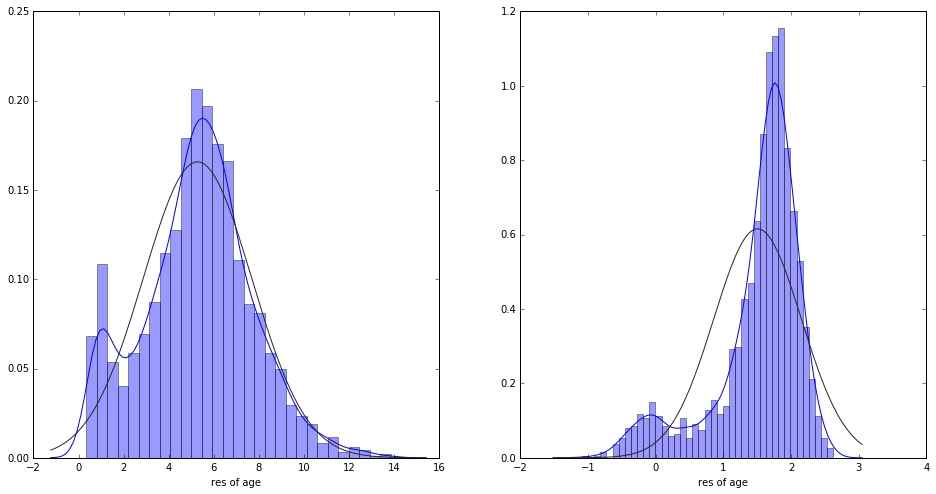

In [7]:
plt.figure(figsize=(16, 8)); log_trans_data = [math.log(x) for x in data['年龄差']]
ax = plt.subplot(1,2,1);sns.distplot(data['年龄差'], axlabel='res of age', fit=stats.norm)
ax = plt.subplot(1,2,2);sns.distplot(log_trans_data, axlabel='res of age', fit=stats.norm)

print("Normality of origin: %s; log-transform: %s" % (stats.shapiro(data['年龄差'])[1] > 0.05,
                                                      stats.shapiro(log_trans_data)[1] > 0.05))

#### ‘会话数’ and its log transformation

Normality of origin: False; log-transform: False


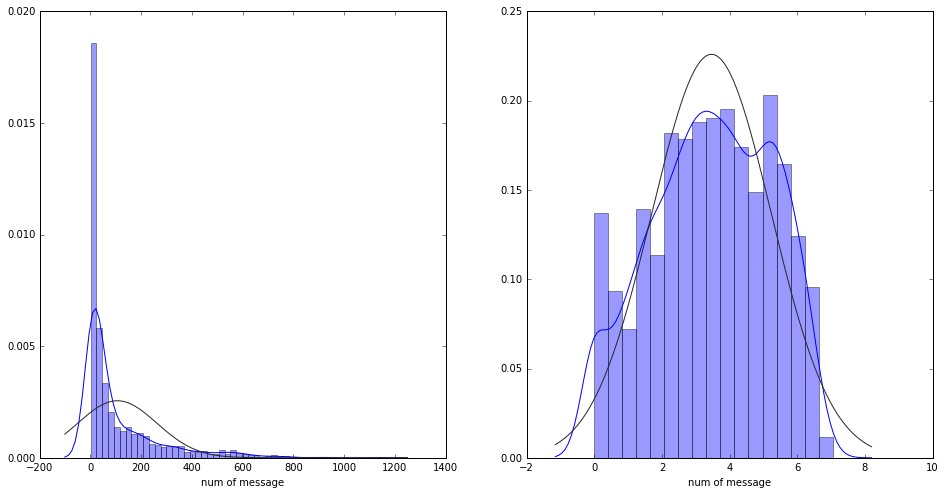

In [8]:
plt.figure(figsize=(16, 8)); log_trans_data = [math.log(x) for x in data['会话数']]
ax = plt.subplot(1,2,1);sns.distplot(data['会话数'], axlabel='num of message', fit=stats.norm)
ax = plt.subplot(1,2,2);sns.distplot(log_trans_data, axlabel='num of message', fit=stats.norm)

print("Normality of origin: %s; log-transform: %s" % (stats.shapiro(data['会话数'])[1] > 0.05,
                                                      stats.shapiro(log_trans_data)[1] > 0.05))

# 5. How to do one-way ANOVA with the non-normal data?

## 5.1 Analysis

对于非正态的数据，我们可以：
1. 忽略非正态性，因为ANOVA测试对正太性具有鲁棒性
2. 使用Kruskal Wallis H测试代替

## 5.2 Analysis of the other three result

结果汇总如下，具体运行结果见后续代码:

| feature   | ANOVA F-value | ANOVA p-value| kw H test H-value| kw H test p-value|
| ---       | ---           | ---          | ---              | ---              |
| 消息数     | 17.38         | 4.92e-14     | 66.86            | 1.04e-13         |
| 消息数(log)| 20.01         | 3.33e-16     | 66.86            | 1.04e-13         |
| 年龄差     | 200.24     	  | 1.11e-16     | 550.95           | 6.36e-118        |
| 年龄差(log)| 298.66        | 1.11e-16     | 550.95           | 6.36e-118        |
| 会话数     | 25.17    	  | 1.11e-16     | 139.29           | 4.00e-29         |
| 会话数(log)| 36.20   	  | 1.11e-16     | 139.29           | 4.00e-29         |

### 消息数 和其log变换

In [9]:
anova(norm_test(data, '消息数', range(1, 6)))

,Source,SS,df,MS,F,p
0,Between,9.982454e+09,4,2.49561e+09,17.3839,4.91829e-14
1,Within,2.921416e+11,2035,1.43559e+08,,
2,Total,3.021240e+11,2039,,,


In [10]:
stats.mstats.kruskalwallis(*[np.array(data[data['群类别'] == i]['消息数']) for i in range(1, 6)])

KruskalResult(statistic=66.85811287687108, pvalue=1.0444084433854297e-13)

In [11]:
anova(norm_test(data, '消息数', range(1, 6), transform=math.log))

,Source,SS,df,MS,F,p
0,Between,505.114422,4,126.279,20.0118,3.33067e-16
1,Within,12841.300829,2035,6.31022,,
2,Total,13346.415252,2039,,,


In [12]:
stats.mstats.kruskalwallis(*[np.array([math.log(x) for x in data[data['群类别'] == i]['消息数']]) for i in range(1, 6)])

KruskalResult(statistic=66.85811287687108, pvalue=1.0444084433854297e-13)

### 年龄差 和其log变换

In [13]:
anova(norm_test(data, '年龄差', range(1, 6)))

,Source,SS,df,MS,F,p
0,Between,3338.236332,4,834.559,200.242,1.11022e-16
1,Within,8481.367055,2035,4.16775,,
2,Total,11819.603387,2039,,,


In [14]:
stats.mstats.kruskalwallis(*[np.array(data[data['群类别'] == i]['年龄差']) for i in range(1, 6)])

KruskalResult(statistic=550.9540936771726, pvalue=6.360595079827829e-118)

In [15]:
anova(norm_test(data, '年龄差', range(1, 6), transform=math.log))

,Source,SS,df,MS,F,p
0,Between,317.113839,4,79.2785,298.664,1.11022e-16
1,Within,540.176930,2035,0.265443,,
2,Total,857.290769,2039,,,


In [16]:
stats.mstats.kruskalwallis(*[np.array([math.log(x) for x in data[data['群类别'] == i]['年龄差']]) for i in range(1, 6)])

KruskalResult(statistic=550.9540936771726, pvalue=6.360595079827829e-118)

### 会话树 和其log变换

In [17]:
anova(norm_test(data, '会话数', range(1, 6)))

,Source,SS,df,MS,F,p
0,Between,2.341366e+06,4,585341,25.1749,1.11022e-16
1,Within,4.731578e+07,2035,23251,,
2,Total,4.965714e+07,2039,,,


In [18]:
stats.mstats.kruskalwallis(*[np.array(data[data['群类别'] == i]['会话数']) for i in range(1, 6)])

KruskalResult(statistic=139.29230336595515, pvalue=4.000821245148908e-29)

In [19]:
anova(norm_test(data, '会话数', range(1, 6), transform=math.log))

,Source,SS,df,MS,F,p
0,Between,422.455889,4,105.614,36.2065,1.11022e-16
1,Within,5936.066470,2035,2.91699,,
2,Total,6358.522359,2039,,,


In [20]:
stats.mstats.kruskalwallis(*[np.array([math.log(x) for x in data[data['群类别'] == i]['会话数']]) for i in range(1, 6)])

KruskalResult(statistic=139.29230336595515, pvalue=4.000821245148908e-29)

# 6. Sampling

我们使用两种采样方法：1. 有放回采样，2. 无放回采样；具体实验结果如下

## 6.1 有放回采样

In [21]:
p = []
mean = lambda X: np.mean(X)
stddev = lambda X: np.sqrt(np.sum([(x - mean(X))**2 for x in X]) / (len(X) - 1))
for repeat in range(10):
    sampler = np.random.choice(range(len(data)), len(data) // 10, replace=True)
    new_data = data.take(sampler)
    anova_res = anova(norm_test(new_data, '平均年龄', range(1, 6)))
    p.append(anova_res['p'][0])

print('mean of p: %e, std dev of p: %e' % (mean(p), stddev(p)))

mean of p: 3.440520e-07, std dev of p: 7.259426e-07


## 6.2 无放回采样

In [22]:
p = []
mean = lambda X: np.mean(X)
stddev = lambda X: np.sqrt(np.sum([(x - mean(X))**2 for x in X]) / (len(X) - 1))
for repeat in range(10):
    sampler = np.random.choice(range(len(data)), len(data) // 10, replace=False)
    new_data = data.take(sampler)
    anova_res = anova(norm_test(new_data, '平均年龄', range(1, 6)))
    p.append(anova_res['p'][0])

print('mean of p: %e, std dev of p: %e' % (mean(p), stddev(p)))

mean of p: 2.141509e-11, std dev of p: 3.908430e-11


从上面结果来看，我们发现有无放回的情况下，无放回采样能够得到更加准确的结果，得到的p值和使用全部数据得到的结果差别较大，此外，如果使用20%的数据，则可以得到相对一致的结果，我们认为是应为采样后样本数太少加上python在进行计算时p-value时存在误差导致的（从之前的结果可以看出在F值差别较大时，我们仍然能得到相似的p值。

# 7. 分类

In [23]:
score_train = []
score_test = []
for repeat in range(10):
    sampler = np.random.permutation(len(data))
    X = data[{'平均年龄', '年龄差'}].take(sampler[:len(data)//10 * 9])
    Y = data['群类别'].take(sampler[:len(data)//10 * 9])
    x = data[{'平均年龄', '年龄差'}].take(sampler[len(data)//10 * 9:])
    y = data['群类别'].take(sampler[len(data)//10 * 9:])
    clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, Y)
    score_train.append(clf.score(X, Y))
    score_test.append(clf.score(x, y))
print('[train] mean of accu: %e, std dev of accu: %e' % (mean(score_train), stddev(score_train)))
print('[test] mean of accu: %e, std dev of accu: %e' % (mean(score_test), stddev(score_test)))

[train] mean of accu: 5.422113e-01, std dev of accu: 4.500565e-03
[test] mean of accu: 5.406863e-01, std dev of accu: 1.201842e-02
